# Imports and dataset load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

In [2]:
california_housing = fetch_california_housing()

X = pd.DataFrame(california_housing.data, columns=california_housing['feature_names'])
y = pd.Series(california_housing.target, name=california_housing['target_names'][0])

df_california = pd.concat([X, y], axis=1)

Attribute Information:

- **MedInc:** Median income in block
- **HouseAge:** Median house age in block
- **AveRooms:** Average number of rooms per household
- **AveBedrms:** Average number of bedrooms per household
- **Population:** Block population
- **AveOccup:** Average number of household members
- **Latitude:** Block latitude
- **Longitude:** Block longitude

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Target information:

- **MedHouseVal:** Median house value for California districts

In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Concatenated dataframe

In [5]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Some descriptive statistics

In [6]:
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 1. Correlation between attributes and attributes with the target.

In [3]:
correlation_california = df_california.corr().round(4)

In [4]:
correlation_matrix = correlation_california.copy()

# Remove the self correlated elements (diagonal)
np.fill_diagonal(correlation_matrix.values, np.nan)

# Unstack the matrix into a series, sort by absolute value, and remove duplicates
correlation_pairs = correlation_matrix.unstack().sort_values(key=abs, ascending=False).drop_duplicates()

# Filter pairs with correlation greater than 0.75 or less than -0.75
filtered_correlation_pairs = correlation_pairs[(correlation_pairs > 0.75) | (correlation_pairs < -0.75)]

print("Pairs of attributes with a correlation greater than 0.75 or less than -0.75:")
for pair, correlation in filtered_correlation_pairs.items():
    print(f"{pair}: {correlation}")

Pairs of attributes with a correlation greater than 0.75 or less than -0.75:
('Latitude', 'Longitude'): -0.9247
('AveBedrms', 'AveRooms'): 0.8476


In [5]:
target_correlation = correlation_california['MedHouseVal'].abs().sort_values(ascending=False)
major_correlation_attribute = target_correlation.index[1]
major_correlation_attribute_value = correlation_california.loc[major_correlation_attribute, 'MedHouseVal']

print(f"The attribute with the highest linear correlation with the target is {major_correlation_attribute} with a correlation of {major_correlation_attribute_value}")

The attribute with the highest linear correlation with the target is MedInc with a correlation of 0.6881


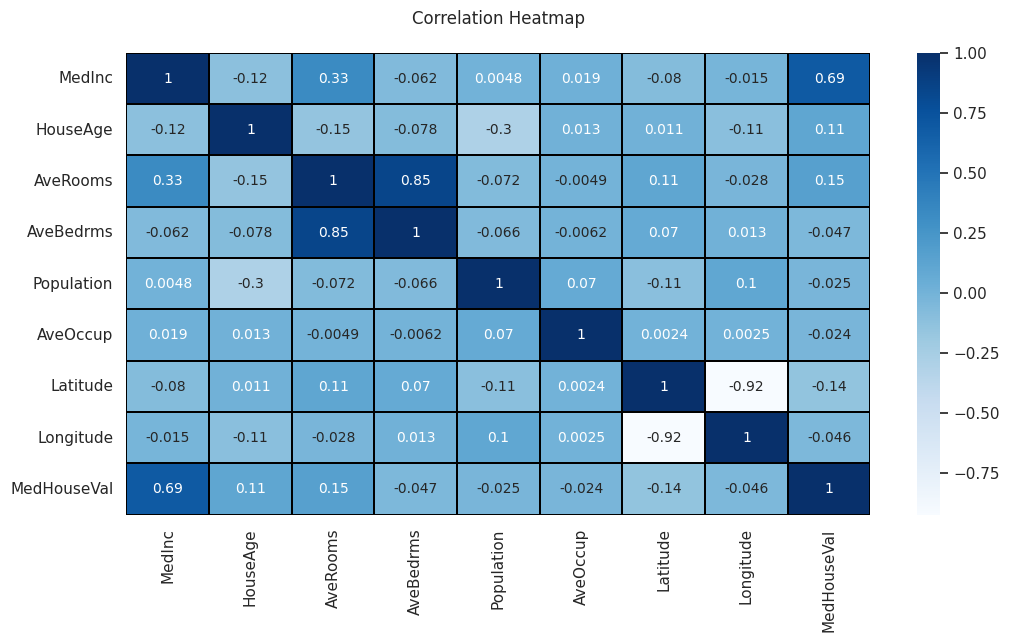

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=correlation_california, annot=True, annot_kws={"size": 10}, linecolor='black', linewidths=0.1, cmap='Blues')
plt.title('Correlation Heatmap\n')
plt.savefig('images/correlation_heatmap.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

# 2. Histograms of the different attributes and the target.

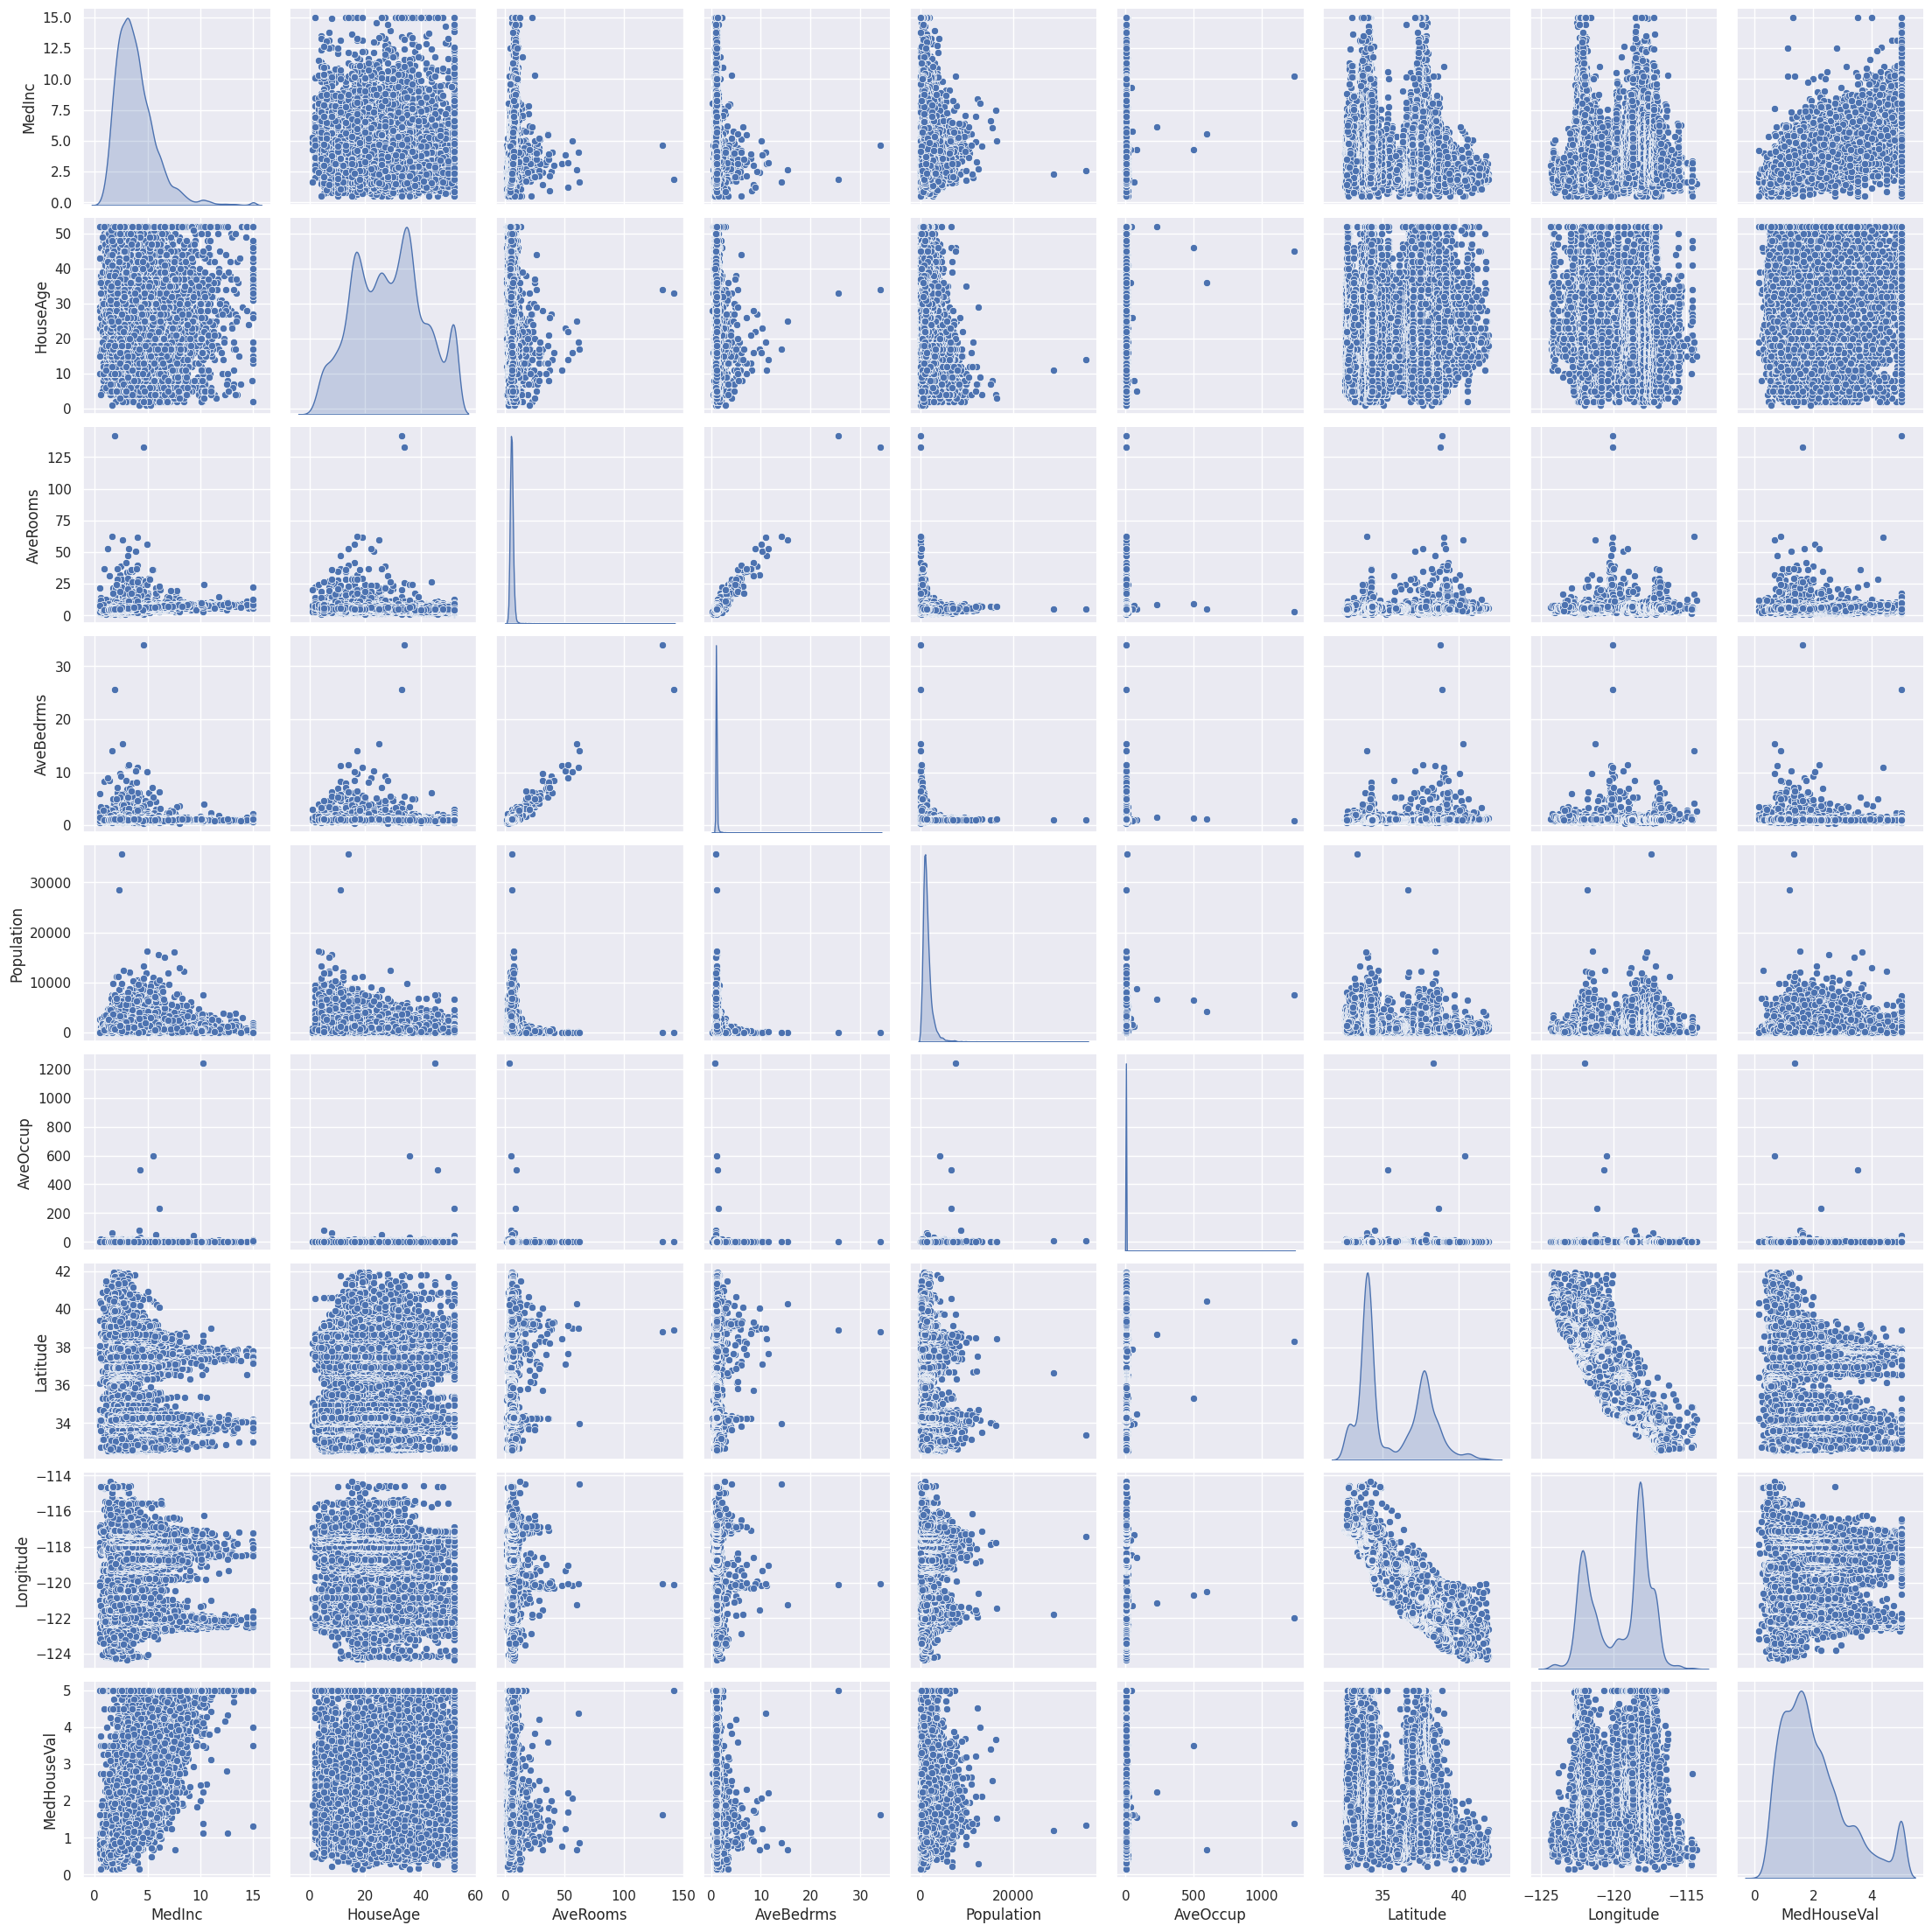

In [11]:
sns.pairplot(data=df_california, diag_kind="kde");

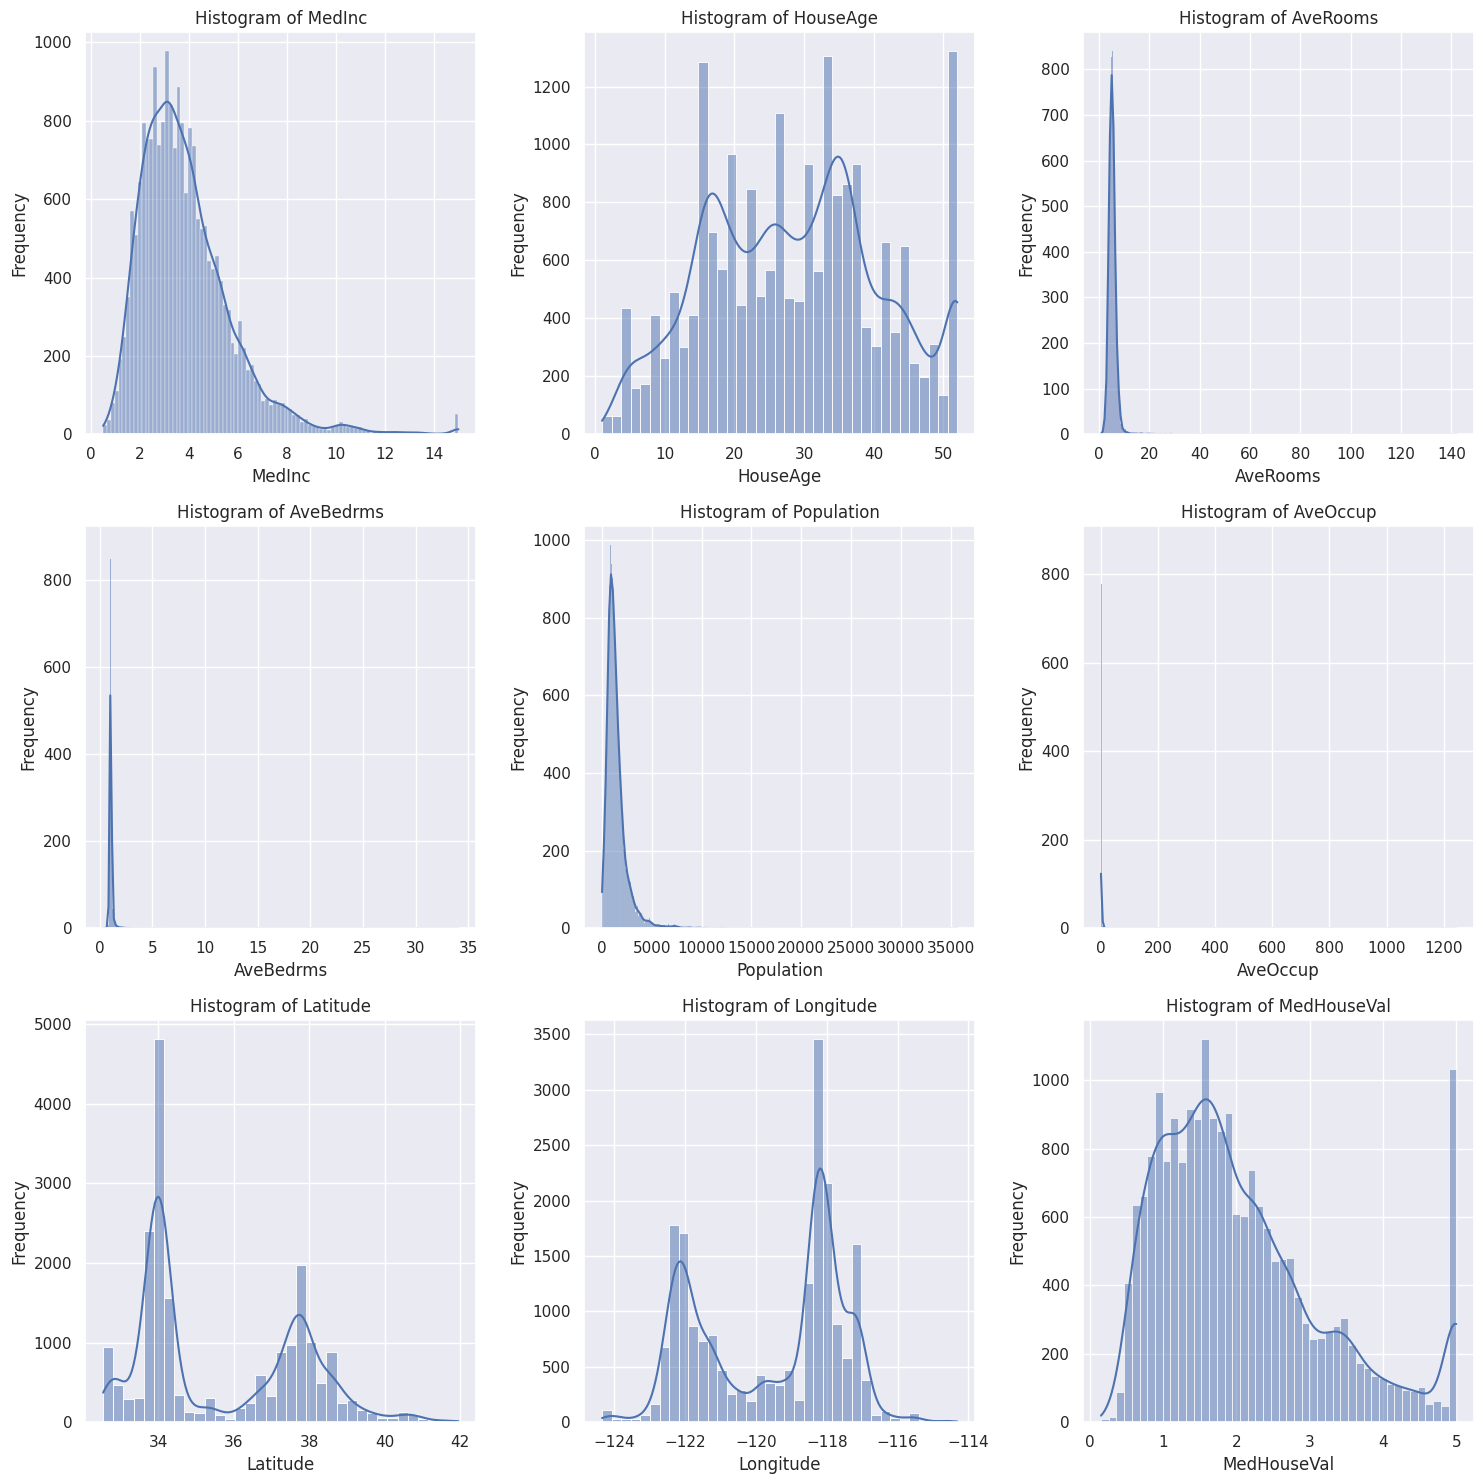

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

num_columns = len(df_california.columns) 
num_rows = (num_columns - 1) // 3 + 1    

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5)) 
axes = axes.flatten() 

for i, column in enumerate(df_california.columns):
    sns.histplot(data=df_california, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, num_rows * 3):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('images/histograms.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

# 3. Linear regression using all attributes

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [18]:
print("Dimension of X_train:",X_train.shape)
print("Values of y_train:",y_train.size)
print("Dimension of X_test:",X_test.shape)
print("Values of y_test:",len(y_test))

Dimension of X_train: (14448, 8)
Values of y_train: 14448
Dimension of X_test: (6192, 8)
Values of y_test: 6192


Train a standard scaler and scale the training data

In [19]:
sc_X = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)

print(f"The scaler mean values: \n\n{sc_X.mean_}")

The scaler mean values: 

[ 3.87689155e+00  2.85753738e+01  5.43812463e+00  1.09803314e+00
  1.42792733e+03  3.11923650e+00  3.56506693e+01 -1.19584102e+02]


In [20]:
print(f"The scaler standard deviation values: \n\n{np.sqrt(sc_X.var_)}")

The scaler standard deviation values: 

[1.90484248e+00 1.26131971e+01 2.45348438e+00 4.47482496e-01
 1.14018573e+03 1.23732074e+01 2.13566827e+00 2.00286090e+00]


Train the linear regression model

In [21]:
regression = LinearRegression()

regression.fit(X_train_scaled, y_train)

print(f"The intersection value will be \n{regression.intercept_ }\n")
print(f"The coefficient values per attribute will be \n{regression.coef_ }\n")

The intersection value will be 
2.0692396089424165

The coefficient values per attribute will be 
[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]



In [22]:
total_variance = y_train.var()
print(f'The total variance of the target variable is {total_variance:.4f}')

The total variance of the target variable is 1.3398


In [25]:
y_pred = regression.predict(X_train_scaled)
explained_variance = np.var(y_pred)

print(f'The explained variance of the model is {explained_variance:.4f}')

The explained variance of the model is 0.8163


We can manually compute the ratio between the total variance and the variance of the model.

In [26]:
var_ratio = explained_variance / total_variance
print(f'The explained variance ratio of the model is {var_ratio:.4f}')

The explained variance ratio of the model is 0.6093


# 4. MSE, MAE and R2 metrics

Scale the test data

In [27]:
X_test_scaled = sc_X.transform(X_test)

Get the test data predictions

In [29]:
y_pred = regression.predict(X_test_scaled)

Compute the metrics

In [30]:
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)

In [31]:
print(f"Test R-squared: {linear_r2:.4f}")
print(f"Test Mean Absolute Error: {linear_mae:.4f}")
print(f"Test Mean Squared Error: {linear_mse:.4f}")

Test R-squared: 0.5958
Test Mean Absolute Error: 0.5272
Test Mean Squared Error: 0.5306


# 5. Ridge regression with 5-fold cross-validation

In [34]:
# Define the alpha values to iterate over
alpha_values = np.linspace(0, 12.5, 100)

best_score = None
best_alpha = None

mean_scores = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    # Perform cross-validation
    cv_scores = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
    mean_score = np.mean(cv_scores)
    mean_scores.append(mean_score)

In [35]:
best_score = np.max(mean_scores)
best_alpha = alpha_values[np.argmax(mean_scores)]

print("Best alpha:", best_alpha)
print("Best score:", best_score)

Best alpha: 6.565656565656566
Best score: -0.5268175765319489


Plot the MSE vs. alpha values for the Ridge regression

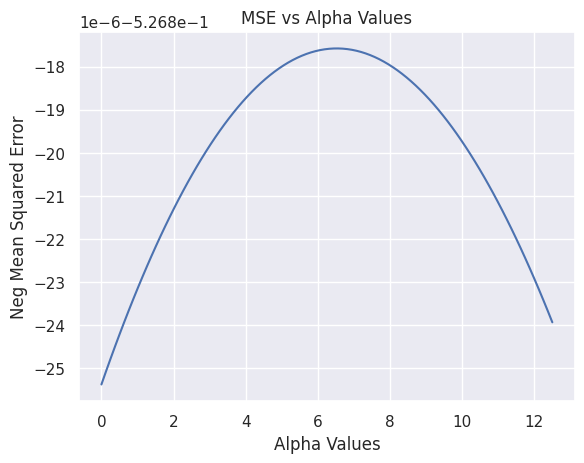

In [36]:
plt.plot(alpha_values, mean_scores)
plt.xlabel('Alpha Values')
plt.ylabel('Neg Mean Squared Error')
plt.title('MSE vs Alpha Values')
plt.grid(True)
plt.savefig('images/mse_vs_alpha.png', dpi=300, bbox_inches='tight', pad_inches=0.25)
plt.show()

Use the best alpha to train the Ridge regression model

In [71]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)

print(f"The Ridge intersection value will be \n{ridge_model.intercept_}\n")
print(f"The Ridge coefficient values per attribute will be \n{ridge_model.coef_}\n")

The Ridge intersection value will be 
2.0692396089424165

The Ridge coefficient values per attribute will be 
[ 8.48762127e-01  1.22700484e-01 -2.97923492e-01  3.46397229e-01
 -6.86724320e-04 -4.17264613e-02 -8.88293472e-01 -8.62975110e-01]



# 6. Linear regression and the best Ridge regression comparison.

Get predictions and compute the metrics

In [ ]:
ridge_y_pred = ridge_model.predict(X_test_scaled)

Get the ridge model metrics

In [ ]:
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)

In [ ]:
print(f"Test Ridge R-squared: {ridge_r2:.4f}")
print(f"Test Ridge Mean Absolute Error: {ridge_mae:.4f}")
print(f"Test Ridge Mean Squared Error: {ridge_mse:.4f}")

Test Ridge R-squared: 0.5959
Test Ridge Mean Absolute Error: 0.5272
Test Ridge Mean Squared Error: 0.5304


Show the metrics from linear regression and ridge regression to compare them

In [77]:
print(f"Test R-squared: {linear_r2:.4f}")
print(f"Test Mean Absolute Error: {linear_mae:.4f}")
print(f"Test Mean Squared Error: {linear_mse:.4f}")
print("="*40)
print(f"Test Ridge R-squared: {ridge_r2:.4f}")
print(f"Test Ridge Mean Absolute Error: {ridge_mae:.4f}")
print(f"Test Ridge Mean Squared Error: {ridge_mse:.4f}")

Test R-squared: 0.5958
Test Mean Absolute Error: 0.5272
Test Mean Squared Error: 0.5306
Test Ridge R-squared: 0.5959
Test Ridge Mean Absolute Error: 0.5272
Test Ridge Mean Squared Error: 0.5304
